In [1]:
from matplotlib import pyplot as plt
import xarray as xr
import numpy as np
import dask
from dask.diagnostics import progress
from tqdm.autonotebook import tqdm 
import intake
import fsspec
import seaborn as sns
#import esmvalcore.preprocessor as ecpr
#import pymannkendall as mkt
import pandas as pd

%matplotlib inline

/tmp/ipykernel_923/261797937.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
wind_dss = xr.open_dataset('/home/jovyan/pangeo/data/jjas_wind.nc')

In [3]:
hist_data = wind_dss.sel({'experiment_id':'historical', 'year':slice(1985,2014),}).mean('year')
hist_data

<xarray.Dataset>
Dimensions:        (source_id: 25, lon: 116, lat: 81, plev: 1)
Coordinates:
  * source_id      (source_id) object 'ACCESS-CM2' 'AWI-CM-1-1-MR' ... 'TaiESM1'
    experiment_id  <U10 'historical'
  * lon            (lon) float64 5.0 6.0 7.0 8.0 9.0 ... 117.0 118.0 119.0 120.0
  * lat            (lat) float64 -40.0 -39.0 -38.0 -37.0 ... 37.0 38.0 39.0 40.0
Dimensions without coordinates: plev
Data variables:
    ua             (source_id, plev, lat, lon) float32 9.099 8.974 ... 1.768
    va             (source_id, plev, lat, lon) float32 -0.454 -0.4496 ... 0.2564

In [4]:
near_future = wind_dss.sel(experiment_id=(wind_dss.experiment_id != 'historical'), year=slice(2025, 2055))
nf_mean = near_future.mean('year')
nf_mean

<xarray.Dataset>
Dimensions:        (source_id: 25, experiment_id: 4, lon: 116, lat: 81, plev: 1)
Coordinates:
  * source_id      (source_id) object 'ACCESS-CM2' 'AWI-CM-1-1-MR' ... 'TaiESM1'
  * experiment_id  (experiment_id) object 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * lon            (lon) float64 5.0 6.0 7.0 8.0 9.0 ... 117.0 118.0 119.0 120.0
  * lat            (lat) float64 -40.0 -39.0 -38.0 -37.0 ... 37.0 38.0 39.0 40.0
Dimensions without coordinates: plev
Data variables:
    ua             (source_id, experiment_id, plev, lat, lon) float32 9.565 ....
    va             (source_id, experiment_id, plev, lat, lon) float32 -0.5422...

In [5]:
far_future = wind_dss.sel(experiment_id=(wind_dss.experiment_id != 'historical'), year=slice(2069, 2099))
ff_mean = far_future.mean('year')
ff_mean

<xarray.Dataset>
Dimensions:        (source_id: 25, experiment_id: 4, lon: 116, lat: 81, plev: 1)
Coordinates:
  * source_id      (source_id) object 'ACCESS-CM2' 'AWI-CM-1-1-MR' ... 'TaiESM1'
  * experiment_id  (experiment_id) object 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * lon            (lon) float64 5.0 6.0 7.0 8.0 9.0 ... 117.0 118.0 119.0 120.0
  * lat            (lat) float64 -40.0 -39.0 -38.0 -37.0 ... 37.0 38.0 39.0 40.0
Dimensions without coordinates: plev
Data variables:
    ua             (source_id, experiment_id, plev, lat, lon) float32 9.38 .....
    va             (source_id, experiment_id, plev, lat, lon) float32 -0.2358...

In [6]:
nf_change = nf_mean - hist_data
nf_change

<xarray.Dataset>
Dimensions:        (source_id: 25, experiment_id: 4, lon: 116, lat: 81, plev: 1)
Coordinates:
  * source_id      (source_id) object 'ACCESS-CM2' 'AWI-CM-1-1-MR' ... 'TaiESM1'
  * experiment_id  (experiment_id) object 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * lon            (lon) float64 5.0 6.0 7.0 8.0 9.0 ... 117.0 118.0 119.0 120.0
  * lat            (lat) float64 -40.0 -39.0 -38.0 -37.0 ... 37.0 38.0 39.0 40.0
Dimensions without coordinates: plev
Data variables:
    ua             (source_id, experiment_id, plev, lat, lon) float32 0.4659 ...
    va             (source_id, experiment_id, plev, lat, lon) float32 -0.0881...

In [7]:
ff_change = ff_mean - hist_data
ff_change

<xarray.Dataset>
Dimensions:        (source_id: 25, experiment_id: 4, lon: 116, lat: 81, plev: 1)
Coordinates:
  * source_id      (source_id) object 'ACCESS-CM2' 'AWI-CM-1-1-MR' ... 'TaiESM1'
  * experiment_id  (experiment_id) object 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * lon            (lon) float64 5.0 6.0 7.0 8.0 9.0 ... 117.0 118.0 119.0 120.0
  * lat            (lat) float64 -40.0 -39.0 -38.0 -37.0 ... 37.0 38.0 39.0 40.0
Dimensions without coordinates: plev
Data variables:
    ua             (source_id, experiment_id, plev, lat, lon) float32 0.2805 ...
    va             (source_id, experiment_id, plev, lat, lon) float32 0.2182 ...

In [8]:
nf_ens = nf_change.mean('source_id')
nf_ens

<xarray.Dataset>
Dimensions:        (experiment_id: 4, lon: 116, lat: 81, plev: 1)
Coordinates:
  * experiment_id  (experiment_id) object 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * lon            (lon) float64 5.0 6.0 7.0 8.0 9.0 ... 117.0 118.0 119.0 120.0
  * lat            (lat) float64 -40.0 -39.0 -38.0 -37.0 ... 37.0 38.0 39.0 40.0
Dimensions without coordinates: plev
Data variables:
    ua             (experiment_id, plev, lat, lon) float32 -0.01043 ... -0.1683
    va             (experiment_id, plev, lat, lon) float32 -0.03401 ... 0.08709

In [9]:
ff_ens = ff_change.mean('source_id')
ff_ens

<xarray.Dataset>
Dimensions:        (experiment_id: 4, lon: 116, lat: 81, plev: 1)
Coordinates:
  * experiment_id  (experiment_id) object 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * lon            (lon) float64 5.0 6.0 7.0 8.0 9.0 ... 117.0 118.0 119.0 120.0
  * lat            (lat) float64 -40.0 -39.0 -38.0 -37.0 ... 37.0 38.0 39.0 40.0
Dimensions without coordinates: plev
Data variables:
    ua             (experiment_id, plev, lat, lon) float32 0.05414 ... -0.2662
    va             (experiment_id, plev, lat, lon) float32 0.0002585 ... 0.2701

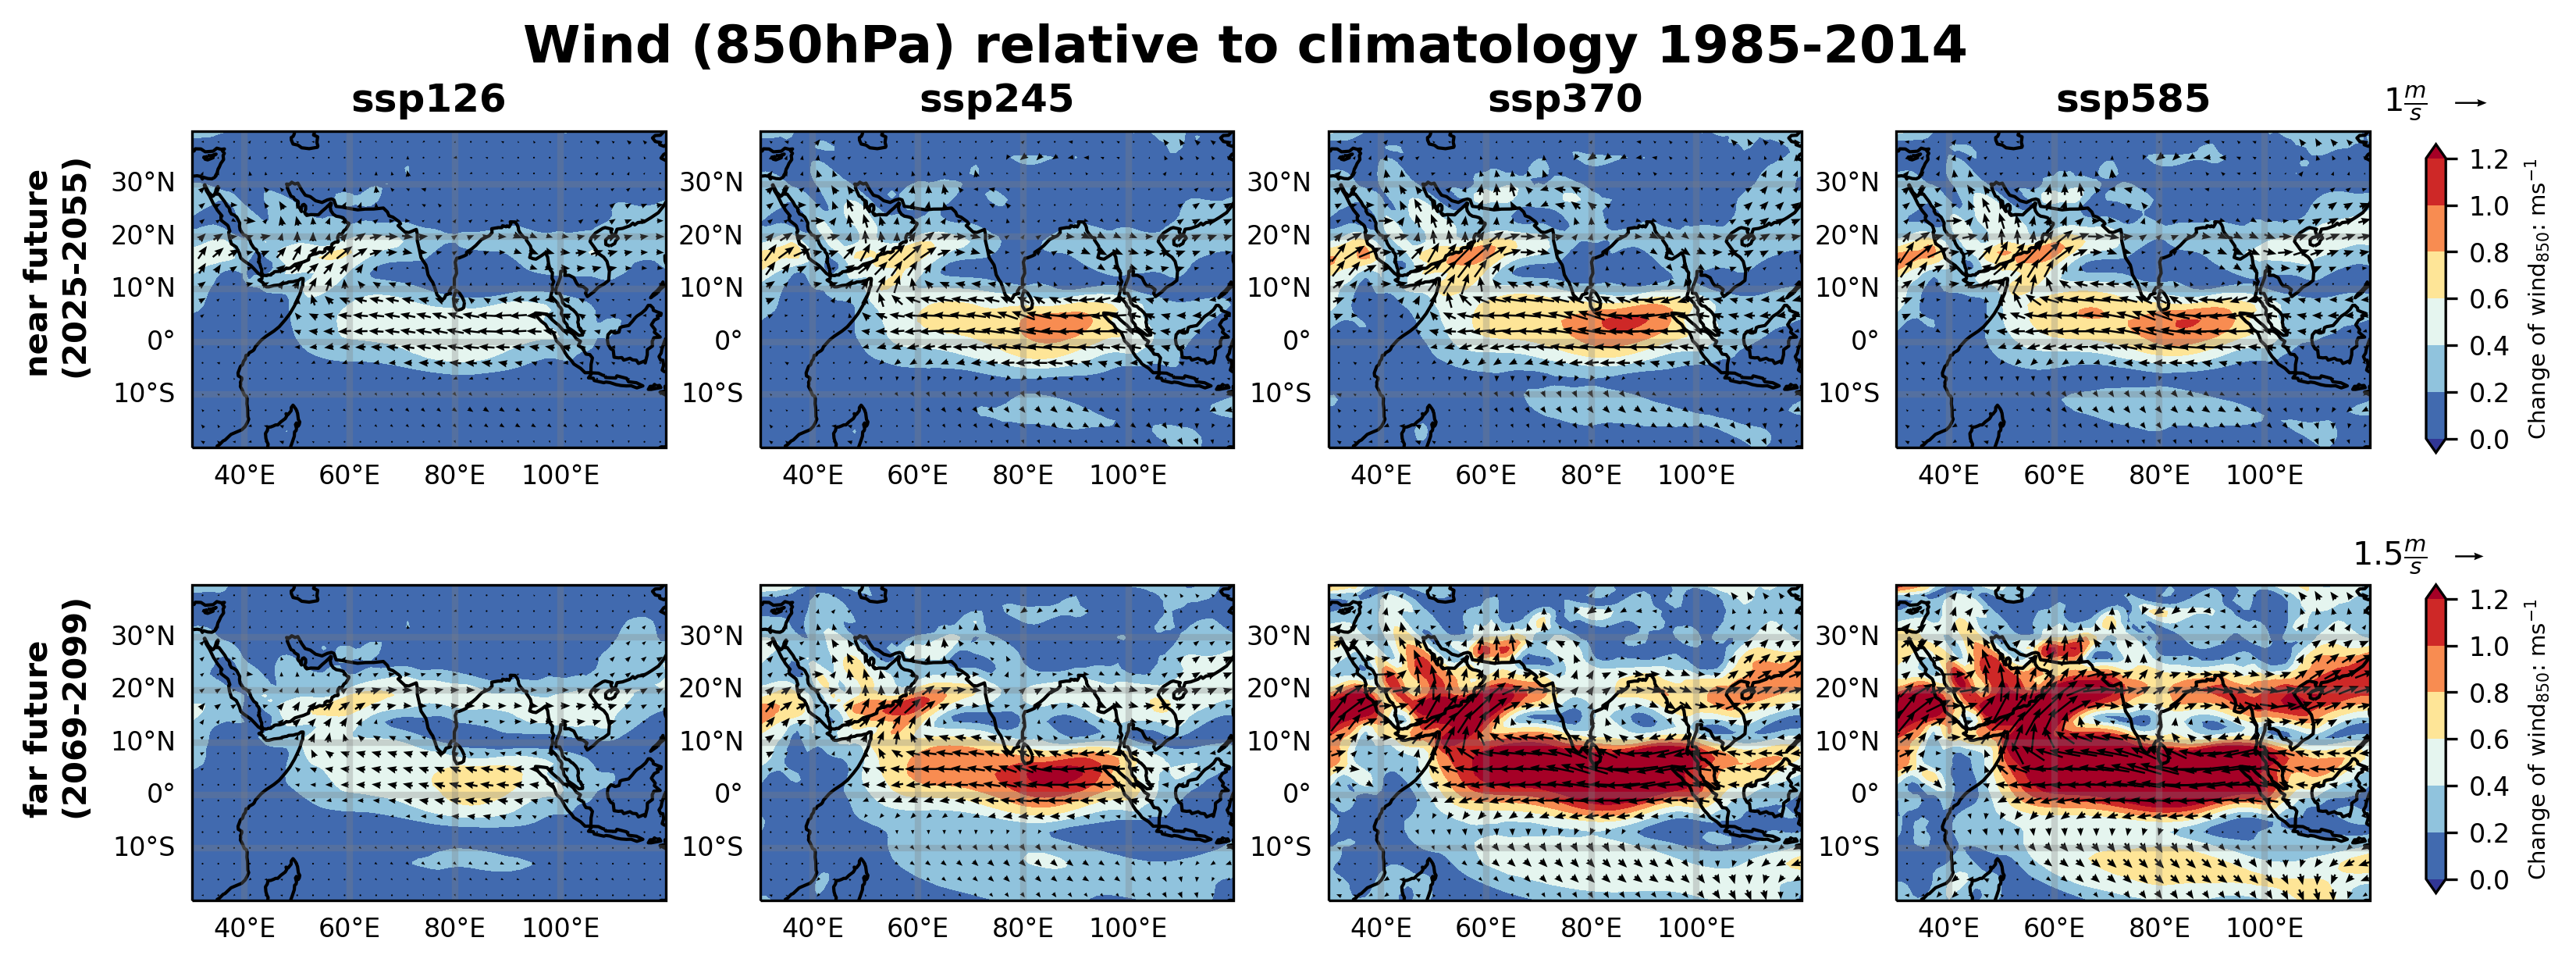

In [131]:
import matplotlib.pyplot as plt
from cartopy import feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import matplotlib.colors as colors
import matplotlib.colorbar as clb
import itertools

change_arr = [nf_ens, ff_ens]


nrow = 2
ncol = 4





cmaps = ['seismic', 'hot_r', 'RdYlGn']

lim_arr = np.linspace(0, 1.2, 7)

cbar_y = 0.56
fig, axs = plt.subplots(nrow, ncol, dpi=300, 
                        subplot_kw={'projection': ccrs.PlateCarree()}, 
                        figsize= (12,4.7))

fig.suptitle( "Wind (850hPa) relative to climatology 1985-2014", x=0.5, y=0.95, fontsize=16, weight='bold')
qv_sc = [15, 25]
qk = [(1, r'$1 \frac{m}{s}$ '),(1.5, r'$1.5 \frac{m}{s}$ ')]
fig_txt = ['near future\n(2025-2055)', 'far future\n(2069-2099)']
for i in range(nrow):
    data = change_arr[i].squeeze()
    X,Y = np.meshgrid(data.lon, data.lat)
    for j in range(ncol):
        ax = axs[i,j]
        ax.coastlines()
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='grey', 
                          alpha=0.3, linestyle='-', draw_labels=True)
        fs=8
        gl.top_labels = False
        gl.right_labels = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': fs}
        gl.ylabel_style = {'size': fs}
        
        pc = ax.contourf(X, Y, np.hypot(data.ua.isel(experiment_id=j).values, data.va.isel(experiment_id=j).values), 
                         cmap='RdYlBu_r', extend='both', levels=lim_arr)
        skip=3
        qv = ax.quiver(X[::skip,::skip], Y[::skip,::skip], 
                data.ua.isel(experiment_id=j)[::skip, ::skip],
                data.va.isel(experiment_id=j)[::skip, ::skip],
                scale=qv_sc[i], scale_units='width', pivot='middle',
                width=0.004, headwidth = 4)

        bbox = [30,120,-20,40]
        ax.set_extent(bbox,crs=ccrs.PlateCarree())
        if i==0:
            ax.set_title(data.experiment_id.isel(experiment_id=j).values, fontsize=12, weight='bold')
    
    ax.quiverkey(qv, 1.18, 1.09, qk[i][0], label= qk[i][1] , 
                      coordinates='axes', labelpos='W')
    
    fig.text(0.065, cbar_y+0.075, fig_txt[i], rotation=90, weight='bold')
    clb_ax_params = [0.92, cbar_y, 0.007, 0.28]
    cbar_y = cbar_y - 0.4
    cbar_ax = fig.add_axes(clb_ax_params)
    cb = fig.colorbar(pc, cax=cbar_ax, orientation='vertical')
    cb.ax.tick_params(labelsize=8)
    cbar_ax.set_ylabel('Change of wind$_{850}$: ms$^{-1}$', size=7)
    


plt.savefig('/home/jovyan/pangeo/plot/future_change_wind.png', bbox_inches='tight', facecolor='w')

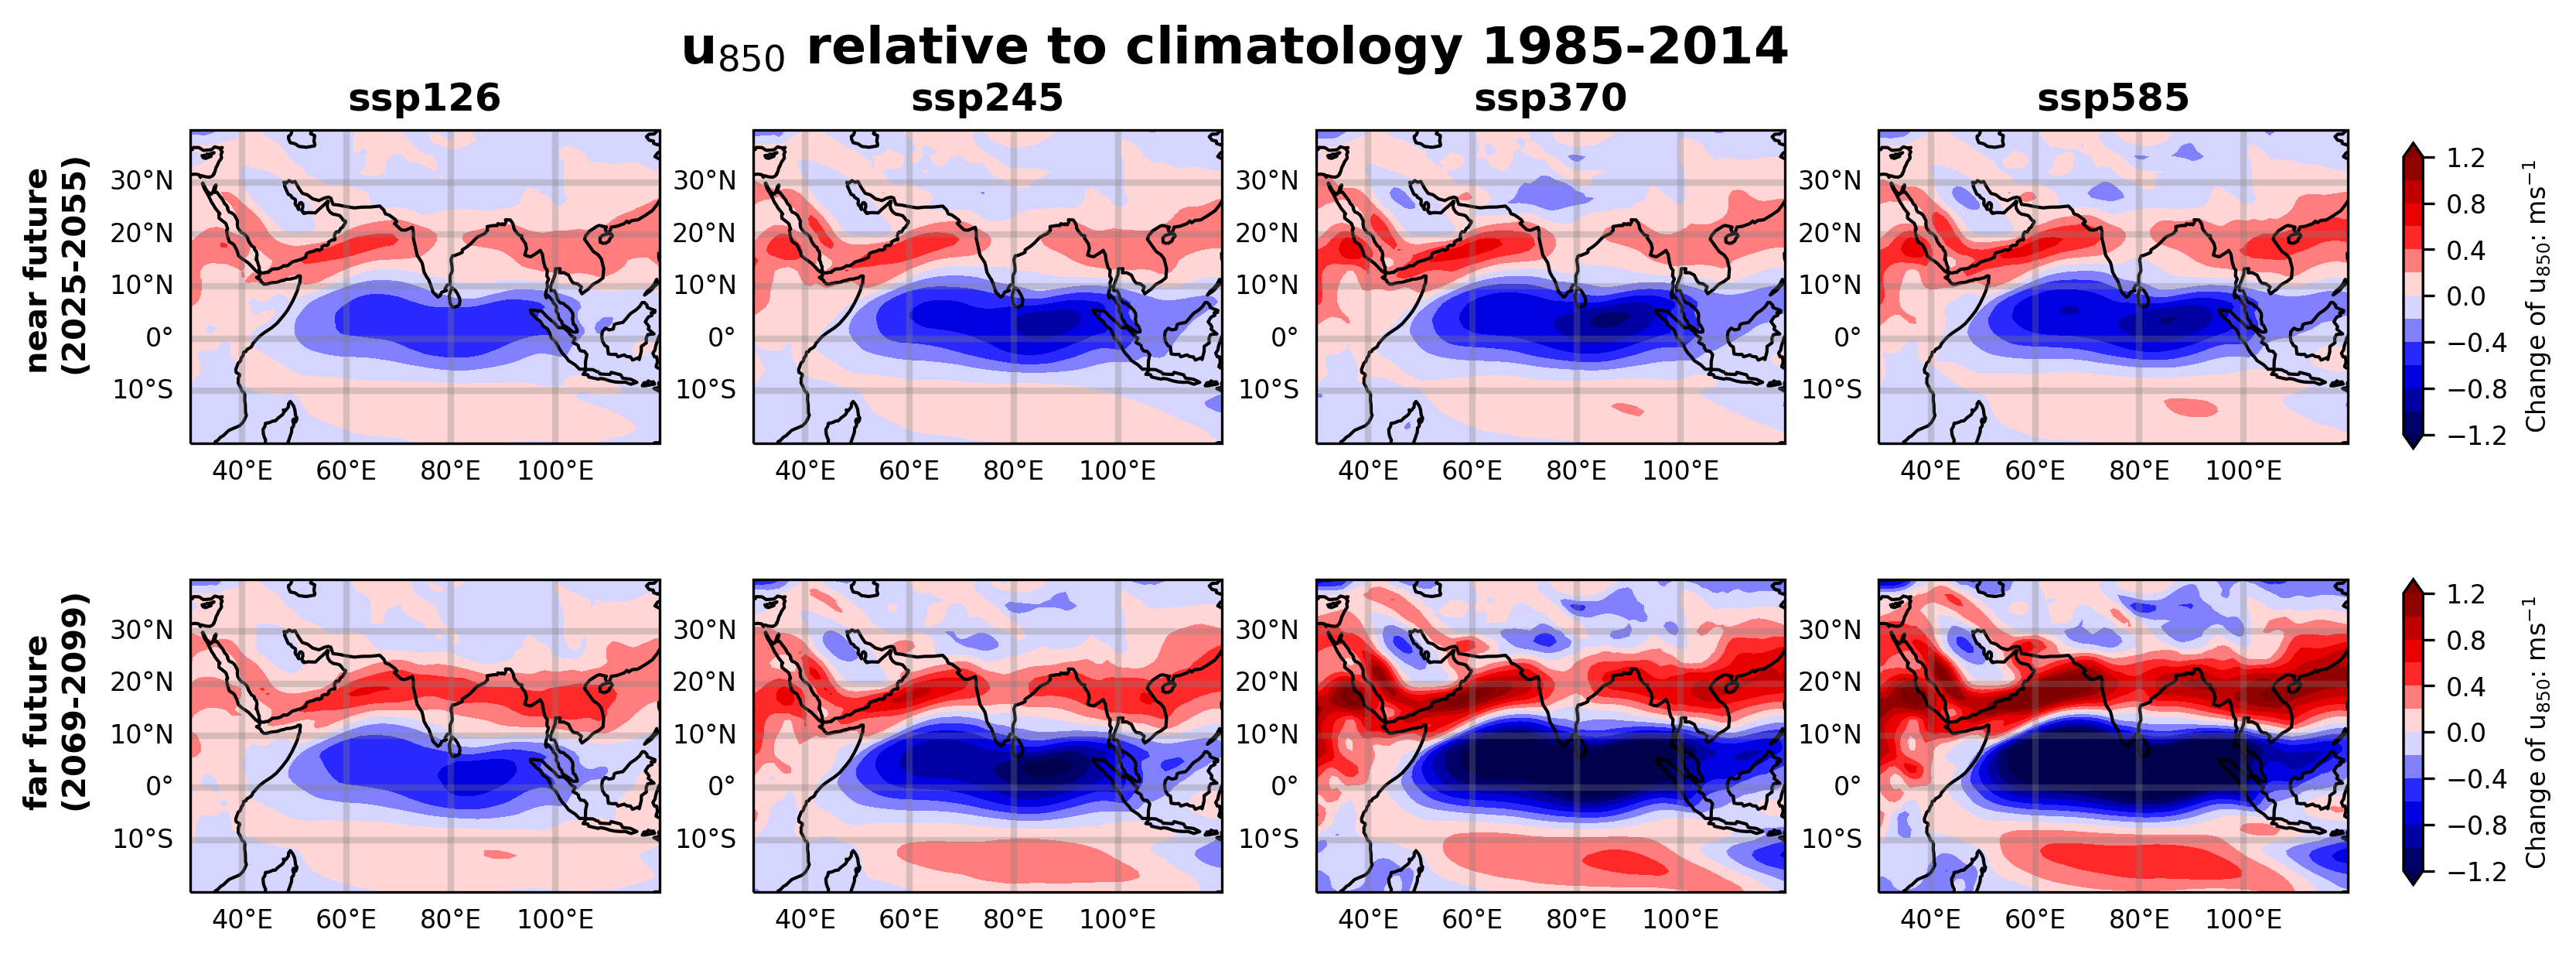

In [120]:
cbar_y = 0.56
fig, axs = plt.subplots(nrow, ncol, dpi=300, 
                        subplot_kw={'projection': ccrs.PlateCarree()}, 
                        figsize= (12,4.7))

fig.suptitle( "u$_{850}$ relative to climatology 1985-2014", x=0.5, y=0.95, fontsize=16, weight='bold')

for i in range(nrow):
    data = change_arr[i].squeeze()
    X,Y = np.meshgrid(data.lon, data.lat)
    for j in range(ncol):
        ax = axs[i,j]
        ax.coastlines()
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='grey', 
                          alpha=0.3, linestyle='-', draw_labels=True)
        fs=8
        gl.top_labels = False
        gl.right_labels = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': fs}
        gl.ylabel_style = {'size': fs}
        
        pc = ax.contourf(X, Y, data.ua.isel(experiment_id=j).values, 
                         cmap=cmaps[0], extend='both', levels=np.linspace(-1.2, 1.2, 13))
        bbox = [30,120,-20,40]
        ax.set_extent(bbox,crs=ccrs.PlateCarree())
        if i==0:
            ax.set_title(data.experiment_id.isel(experiment_id=j).values, fontsize=12, weight='bold')
    
    
    
    fig.text(0.065, cbar_y+0.075, fig_txt[i], rotation=90, weight='bold')
    clb_ax_params = [0.92, cbar_y, 0.007, 0.28]
    cbar_y = cbar_y - 0.4
    cbar_ax = fig.add_axes(clb_ax_params)
    cb = fig.colorbar(pc, cax=cbar_ax, orientation='vertical')
    cb.ax.tick_params(labelsize=8)
    cbar_ax.set_ylabel('Change of u$_{850}$: ms$^{-1}$', size=8)

plt.savefig('/home/jovyan/pangeo/plot/u_future_change.png', bbox_inches='tight', facecolor='w')

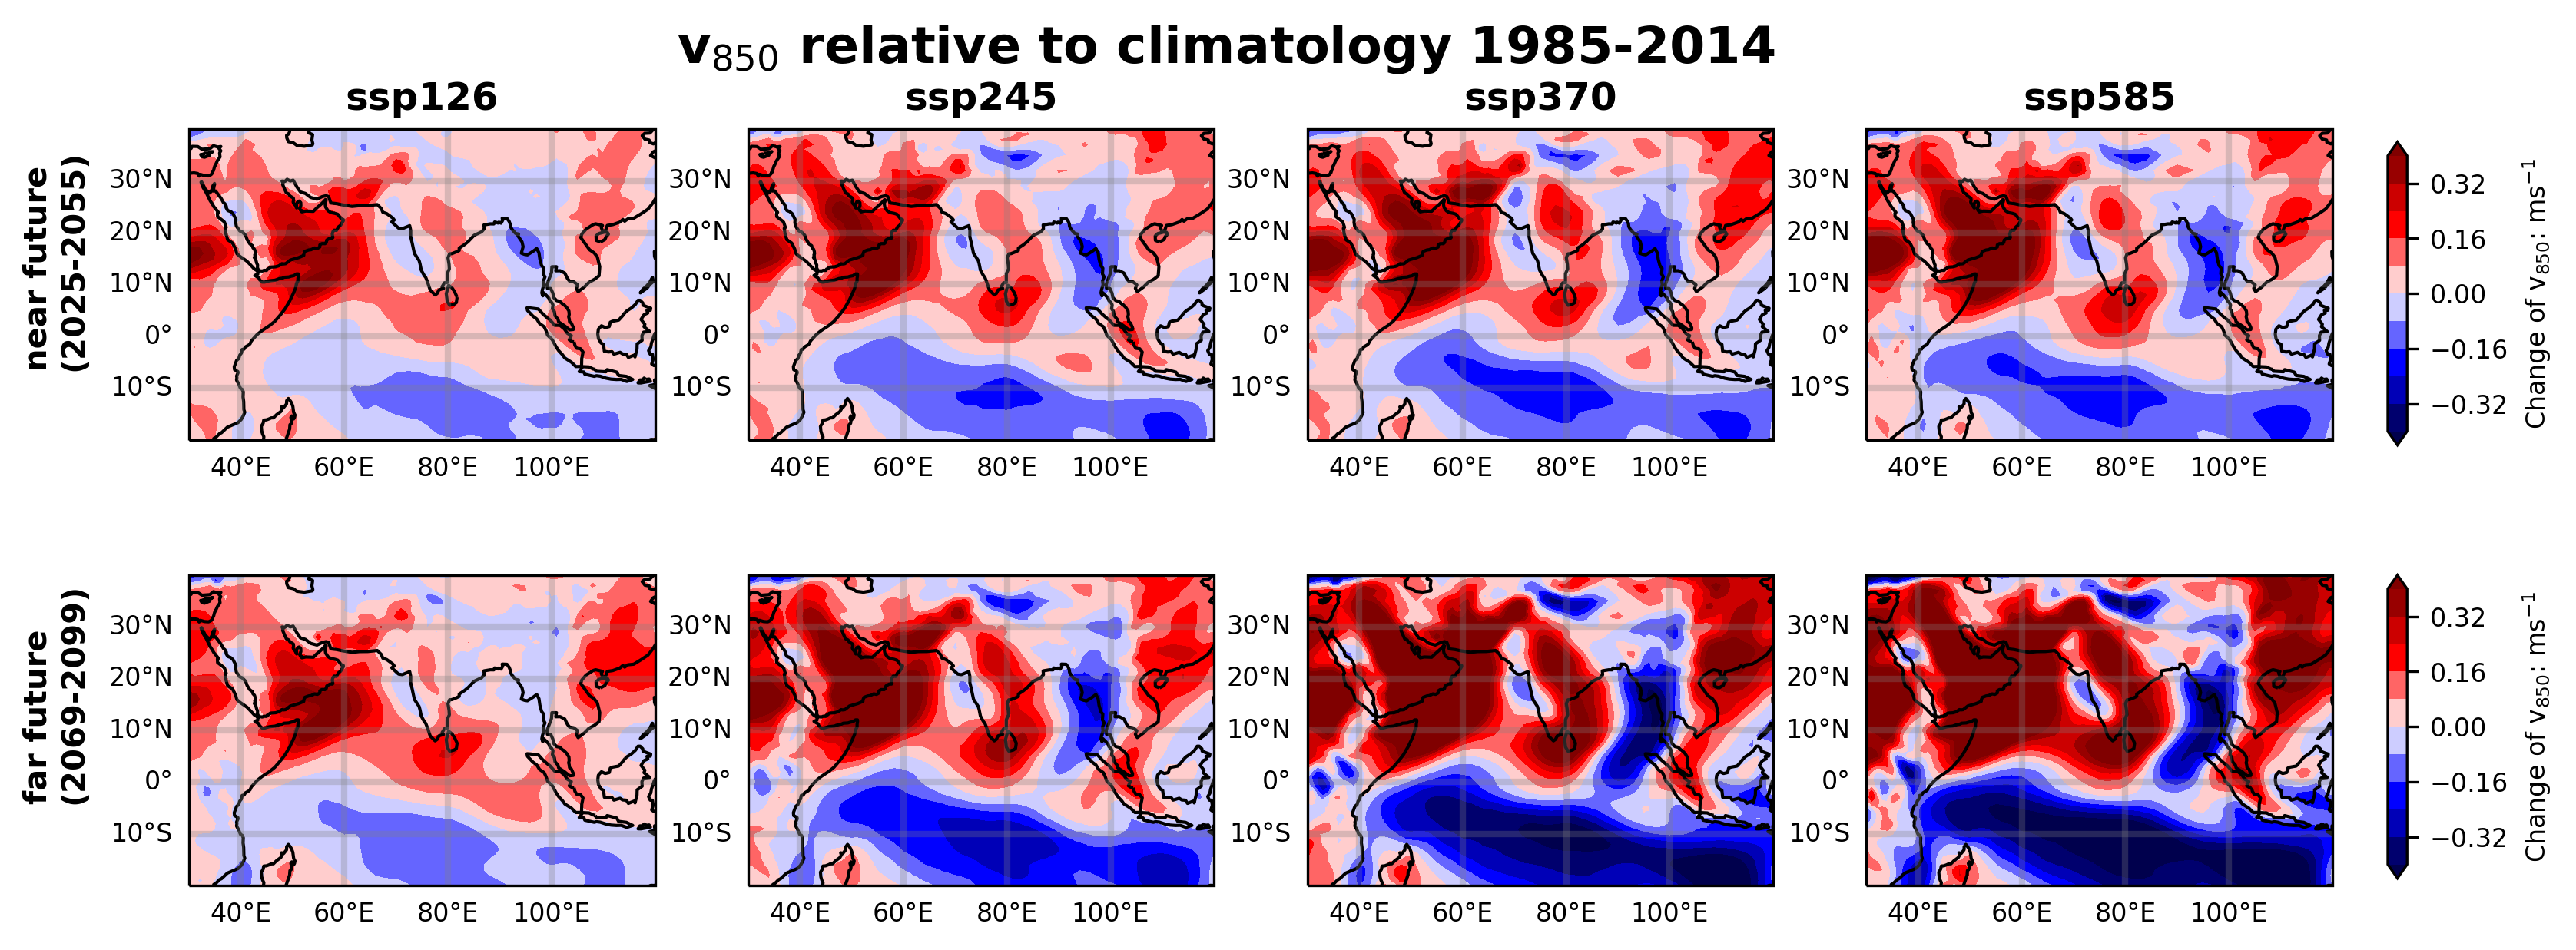

In [124]:
cbar_y = 0.56
fig, axs = plt.subplots(nrow, ncol, dpi=300, 
                        subplot_kw={'projection': ccrs.PlateCarree()}, 
                        figsize= (12,4.7))

fig.suptitle( "v$_{850}$ relative to climatology 1985-2014", x=0.5, y=0.95, fontsize=16, weight='bold')

for i in range(nrow):
    data = change_arr[i].squeeze()
    X,Y = np.meshgrid(data.lon, data.lat)
    for j in range(ncol):
        ax = axs[i,j]
        ax.coastlines()
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='grey', 
                          alpha=0.3, linestyle='-', draw_labels=True)
        fs=8
        gl.top_labels = False
        gl.right_labels = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': fs}
        gl.ylabel_style = {'size': fs}
        
        pc = ax.contourf(X, Y, data.va.isel(experiment_id=j).values, 
                         cmap=cmaps[0], extend='both',levels=np.linspace(-0.4, 0.4, 11))
        bbox = [30,120,-20,40]
        ax.set_extent(bbox,crs=ccrs.PlateCarree())
        if i==0:
            ax.set_title(data.experiment_id.isel(experiment_id=j).values, fontsize=12, weight='bold')
    
    
    
    fig.text(0.065, cbar_y+0.075, fig_txt[i], rotation=90, weight='bold')
    clb_ax_params = [0.92, cbar_y, 0.007, 0.28]
    cbar_y = cbar_y - 0.4
    cbar_ax = fig.add_axes(clb_ax_params)
    cb = fig.colorbar(pc, cax=cbar_ax, orientation='vertical')
    cb.ax.tick_params(labelsize=8)
    cbar_ax.set_ylabel('Change of v$_{850}$: ms$^{-1}$', size=8)

plt.savefig('/home/jovyan/pangeo/plot/v_future_change.png', bbox_inches='tight', facecolor='w')